In [3]:
import warnings
warnings.filterwarnings("ignore")#to ignore warnings
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv('Week_8_Q&A_dataset - Sheet1 (2).csv')

In [7]:
data

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


# carry out the decscriptive analysis on data set

In [9]:
data.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


<AxesSubplot:xlabel='Total Marks', ylabel='Count'>

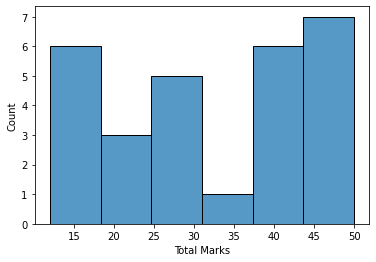

In [10]:
sns.histplot(data=data,x="Total Marks")

In [11]:
data.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [14]:
data.isna().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [17]:
data.describe(include='all')#descriptive ststistics on dataset

,Gender,Test preparation,Total Marks
count,28,28,28.000000
unique,2,2,NaN
top,female,none,NaN
freq,16,21,NaN
mean,NaN,NaN,32.321429
std,NaN,NaN,12.454520
min,NaN,NaN,12.000000
25%,NaN,NaN,22.500000
50%,NaN,NaN,33.000000
75%,NaN,NaN,43.250000


In [21]:
data.groupby(["Gender","Test preparation"]).mean()

Total Marks
Gender Test preparation             
female completed           45.250000
       none                29.916667
male   completed           43.666667
       none                26.000000

<AxesSubplot:xlabel='Total Marks', ylabel='Density'>

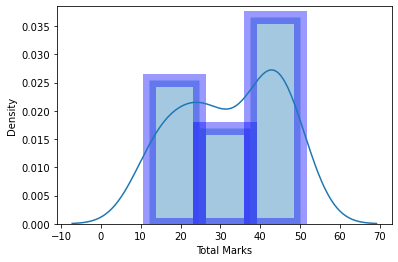

In [23]:
sns.distplot(data['Total Marks'],hist_kws=dict(edgecolor='blue',linewidth='13'))

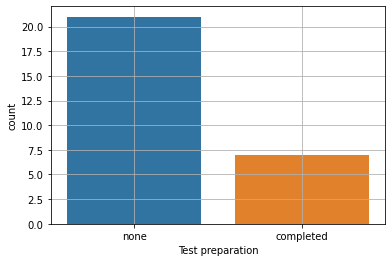

In [26]:
sns.countplot(data['Test preparation'])#count plot from seaborn
plt.grid()

In [28]:
data.groupby("Gender").describe()#gender wise descriptive analysis

Total Marks                                                      
             count       mean        std   min    25%   50%    75%   max
Gender                                                                  
female        16.0  33.750000  12.865976  12.0  25.50  39.0  43.50  50.0
male          12.0  30.416667  12.168950  14.0  21.75  29.0  43.25  47.0

In [30]:
data['Gender'].value_counts()

female    16
male      12
Name: Gender, dtype: int64

# 2 .to check whether female and malestudents  scored the same  marks
H0:marks of both male are female are same
H1:marks of both differ

In [35]:
from  scipy import stats
female=data[data['Gender']=='female']['Total Marks']#assigning marks of female to varibale called female

In [36]:
female

1     28
2     18
3     48
4     21
5     40
7     12
14    41
15    13
16    48
17    45
22    41
23    27
24    27
25    38
26    50
27    43
Name: Total Marks, dtype: int64

In [37]:
male=data[data['Gender']=='male']['Total Marks']

In [42]:
ttest,p_value=stats.ttest_ind(female,male)
print("p_value",p_value)

p_value 0.4937822317960763


In [43]:
if p_value<0.05:
    print("we reject null hypothesis i.e marks of both are differ")
else:
    print("we accept null hupothesis i.e marks are same ")

we accept null hupothesis i.e marks are same 


# 3.to check whether test preperation helps the student
H0:test preperation wont helps the student for better performance
H1:test preperation has  effect in students performance

In [45]:
none=data[data['Test preparation']=='none']['Total Marks']

In [46]:
none

0     14
1     28
2     18
3     48
4     21
6     30
7     12
8     18
9     24
11    23
13    28
14    41
15    13
17    45
18    47
19    36
20    14
22    41
23    27
24    27
25    38
Name: Total Marks, dtype: int64

In [48]:
completed=data[data['Test preparation']=='completed']['Total Marks']

In [52]:
ttest,pval=stats.ttest_ind(none,completed)
print("pvalue is",pval)
if pval<0.05:
    print("we reject null hypothesis ie,test preperation helps s")
else:
    print("we accept null hypothesis test preperation has no effect  on marks")

pvalue is 0.0012671292457320106
we reject null hypothesis ie,test preperation helps s
